In [184]:
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
from scipy.stats import norm
import netCDF4 as n4
import xarray
from scipy.interpolate import griddata
%run define.ipynb
from scipy.stats import linregress

In [185]:
jmx=101; #102
delx = 2.0/jmx;
x = np.arange(-1.0+delx/2,1.0,delx)
print(len(x))
phi = 180/np.pi*np.arcsin(x)

cp = 1004
L = 2.5e6

CMIP5 = io.loadmat('PI_LGM_annual_AHT_TS.mat')
x_lat = CMIP5['lat'][0]
#mask = [0, 1, 2, 3, 4, 7, 8, 10, 11, 12, 13, 14, 15]

101


In [280]:
PI_ASR = []
PI_OLR = []
LGM_ASR = []
LGM_OLR = []
T_ctrl = []
T925_ctrl = []
TS_pert = []
T925_pert = []
pert_divH = []
pert_divF = []
Rf_list = []
B_list = []
G_list = []
pert_E_m_P_list = []
for i in range(7):
    PI_T_i = griddata(x_lat, CMIP5['PI_TS'][i], phi, method='linear')
    PI_T925_i = griddata(x_lat, CMIP5['PI_T925'][i], phi, method='linear')
    PI_Q_i = griddata(x_lat, CMIP5['PI_Q925'][i], phi, method='linear')
    PI_F_i = griddata(x_lat, CMIP5['PI_AHT'][i], phi, method='linear') * 1e15
    PI_H_i = griddata(x_lat, CMIP5['PI_OHT'][i], phi, method='linear') * 1e15
    PI_ASR_i = griddata(x_lat, CMIP5['PI_ASR'][i], phi, method='linear')
    PI_OLR_i = griddata(x_lat, CMIP5['PI_OLR'][i], phi, method='linear')
    PI_SHF_i = griddata(x_lat, CMIP5['PI_SHF'][i], phi, method='linear')
    LGM_T_i = griddata(x_lat, CMIP5['LGM_TS'][i], phi, method='linear')
    LGM_T925_i = griddata(x_lat, CMIP5['LGM_T925'][i], phi, method='linear')
    LGM_Q_i = griddata(x_lat, CMIP5['LGM_Q925'][i], phi, method='linear')
    LGM_F_i = griddata(x_lat, CMIP5['LGM_AHT'][i], phi, method='linear') * 1e15
    LGM_H_i = griddata(x_lat, CMIP5['LGM_OHT'][i], phi, method='linear') * 1e15
    LGM_ASR_i = griddata(x_lat, CMIP5['LGM_ASR'][i], phi, method='linear')
    LGM_OLR_i = griddata(x_lat, CMIP5['LGM_OLR'][i], phi, method='linear')
    LGM_SHF_i = griddata(x_lat, CMIP5['LGM_SHF'][i], phi, method='linear')
    PI_F_LH_i = griddata(x_lat, CMIP5['PI_AHT_moist'][i], phi, method='linear') * 1e15
    LGM_F_LH_i = griddata(x_lat, CMIP5['LGM_AHT_moist'][i], phi, method='linear') * 1e15
    pert_F_LH_i = LGM_F_LH_i - PI_F_LH_i
    pert_divF_LH_i = Div(x, pert_F_LH_i)
    pert_E_m_P_i = pert_divF_LH_i/(2.45e6*1e3)*np.pi*1e7
    pert_T_i = LGM_T_i - PI_T_i
    pert_T925_i = LGM_T925_i - PI_T925_i
    for j in range(2):
        for k in range(pert_T925_i.shape[0]):
            if np.isnan(pert_T925_i[k]):
                if k > 0 and not np.isnan(pert_T925_i[k-1]):
                    pert_T925_i[k] = pert_T925_i[k-1]
                elif k < pert_T925_i.shape[0]-1 and not np.isnan(pert_T925_i[k+1]):
                    pert_T925_i[k] = pert_T925_i[k+1]
    
    pert_Q_i = LGM_Q_i - PI_Q_i
    pert_F_i = LGM_F_i - PI_F_i
    pert_H_i = LGM_H_i - PI_H_i
    pert_ASR_i = LGM_ASR_i - PI_ASR_i
    pert_OLR_i = LGM_OLR_i - PI_OLR_i
    pert_SHF_i = LGM_SHF_i - PI_SHF_i
    PI_theta_e_i = 1/cp*(cp*PI_T_i + L*PI_Q_i)
    LGM_theta_e_i = 1/cp*(cp*LGM_T_i + L*LGM_Q_i)
    PI_divF_i = Div(x, PI_F_i)
    PI_divH_i = Div(x, PI_H_i)
    LGM_divF_i = Div(x, LGM_F_i)
    LGM_divH_i = Div(x, LGM_H_i)
    pert_divF_i = LGM_divF_i - PI_divF_i
    pert_divH_i = LGM_divH_i - PI_divH_i
    pert_theta_e_i = LGM_theta_e_i - PI_theta_e_i
    pert_netTOA_i = np.mean(LGM_ASR_i-PI_OLR_i)
    Frc_i = PI_OLR_i/np.mean(PI_OLR_i)*np.abs(pert_netTOA_i)*np.log2(190/280)
    net_i = pert_divF_i+pert_divH_i
    Fb_i = (net_i - Frc_i)/pert_T_i
    
    #Fb_i = np.minimum(Fb_i, 0.01)
    
    #Rf_G = np.minimum(Frc_i + pert_divH_i, -0.01)
    #Frc_i = Rf_G - pert_divH_i
    # append
    PI_ASR.append(PI_ASR_i)
    PI_OLR.append(PI_OLR_i)
    LGM_ASR.append(LGM_ASR_i)
    LGM_OLR.append(LGM_OLR_i)
    TS_pert.append(pert_T_i)   # switch T
    T925_pert.append(pert_T925_i)
    pert_divH.append(pert_divH_i)
    pert_divF.append(pert_divF_i)
    Rf_list.append(Frc_i)
    G_list.append(pert_divH_i)
    B_list.append(Fb_i)
    T_ctrl.append(PI_T_i)
    T925_ctrl.append(PI_T925_i)
    pert_E_m_P_list.append(pert_E_m_P_i)
PI_ASR = np.array(PI_ASR)
PI_OLR = np.array(PI_OLR)
LGM_ASR = np.array(LGM_ASR)
LGM_OLR = np.array(LGM_OLR)
T_pert = np.array(T_pert)
pert_divH = np.array(pert_divH)
pert_divF = np.array(pert_divF)
Rf_list = np.array(Rf_list)
G_list = np.array(G_list)
B_list = -np.array(B_list)
T_ctrl = np.array(T_ctrl)
T925_ctrl = np.array(T925_ctrl)
pert_E_m_P_list = np.array(pert_E_m_P_list)

-3.3302445531047518
0.9931412014790344


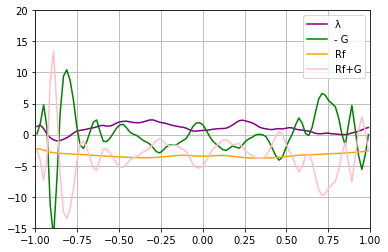

In [271]:
plt.plot(x,B_list[0], label = 'λ', color = 'purple')
plt.plot(x,-G_list[0], label = '- G', color = 'green')
plt.plot(x,Rf_list[0], label = 'Rf', color = 'orange')
plt.plot(x,Rf_list[0]+G_list[0], label = 'Rf+G', color = 'pink')

print(np.mean(Rf_list[0]+G_list[0]))
print(np.mean(B_list[0]))

plt.legend()
plt.ylim(-15,20)
plt.xlim(-1,1)
plt.grid()

nan
nan


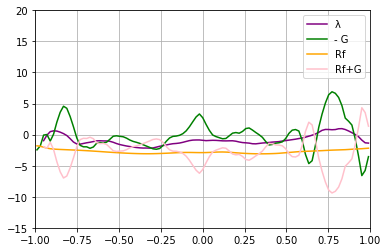

In [246]:
PI_OLR_mean = np.mean(PI_OLR, axis=0)
pert_netTOA = np.mean(LGM_ASR-PI_OLR)
Frc = PI_OLR_mean/np.mean(PI_OLR_mean)*np.abs(pert_netTOA)*np.log2(200/280)
net = np.mean(pert_divF+pert_divH, axis=0)
T_pert_1 = np.mean(T_pert, axis=0)
Fb = (net - Frc)/T_pert_1
G = np.mean(pert_divH, axis=0)
divF_pert = np.mean(pert_divF, axis=0)
Rf = divF_pert - T_pert_1*Fb+ G
plt.plot(x,Fb, label = 'λ', color = 'purple')
plt.plot(x,-G, label = '- G', color = 'green')
plt.plot(x,Frc, label = 'Rf', color = 'orange')
plt.plot(x,Rf+G, label = 'Rf+G', color = 'pink')

print(np.mean(Rf))
print(np.mean(Fb))

plt.legend()
plt.ylim(-15,20)
plt.xlim(-1,1)
plt.grid()

In [284]:
T_ctrl = (T925_ctrl+T_ctrl)/2
from scipy.io import savemat
name = ['T_ctrl','TS_pert','T925_pert','pert_E_m_P_list', 'divF_pert', 'divH_pert', 'Rf_list', 'B_list']
mdic = {"name": name, "T_ctrl":T_ctrl-273.15,"TS_pert":TS_pert,"T925_pert":T925_pert,"pert_E_m_P_list":pert_E_m_P_list,"divF_pert": pert_divF,"divH_pert": pert_divH, 'Rf_list':Rf_list, 'B_list':B_list}
savemat("CMIP5_LGM_Rf_B.mat", mdic)

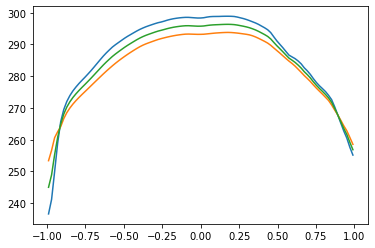

In [283]:
plt.plot(x,np.mean(T_ctrl, axis=0))
plt.plot(x,np.mean(T925_ctrl, axis=0))
plt.plot(x,np.mean((T925_ctrl+T_ctrl)/2, axis=0))

In [285]:
T_ctrl

array([[248.05198289, 249.9936677 , 255.62826923, 260.77771503,
        265.39010858, 269.35546517, 271.84342299, 273.49376413,
        274.82713578, 275.98818508, 277.06147568, 278.06977068,
        279.04894349, 280.04218375, 281.03160793, 282.01956415,
        282.97459652, 283.92695065, 284.87229423, 285.75034157,
        286.557525  , 287.3420481 , 288.03901066, 288.65809649,
        289.29683092, 289.93835611, 290.53027443, 291.07078624,
        291.60866459, 292.1704092 , 292.65758611, 293.08709364,
        293.45813747, 293.76776705, 294.06523998, 294.3634357 ,
        294.63393454, 294.81761978, 295.01992998, 295.26467642,
        295.46575771, 295.6342717 , 295.77452719, 295.87428838,
        295.93895159, 295.97097609, 295.92072275, 295.81608806,
        295.71819658, 295.64457854, 295.62551193, 295.70970549,
        295.872207  , 296.02876703, 296.15870198, 296.23992441,
        296.27725391, 296.35221212, 296.40832361, 296.41140545,
        296.37870372, 296.28949971, 296.